In [1]:
import pandas as pd

In [9]:
train = pd.read_csv(
    '../data/adult.data',
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")
test  = pd.read_csv('../data/adult.test',
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        skiprows=1, 
        na_values="?")

# Data Dictionary

## male: 0 female: 1

Categorical(8)
Sex(성별) : Female(여성), Male(남성).
marital-status(결혼유무)
Married-civ-spouse(기혼), Divorced(이혼), Never-married(미혼), Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
Relationship(가족관계) : Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
Education(학력)
Bachelors(4년제학사), Some-college(전문대), 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
Race(인종) : White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
native-country(거주지)
United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
Occupation(직업)
Tech-support(기술자), Craft-repair(기능공), Other-service(제3서비스업), Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
Workclass(직업분류)
Private(자영업), Self-emp-not-inc(법인이 없는 개인사업가), Self-emp-inc(법인이 있는 개인사업가), Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
Integer(6)
Age(연령)
capital-gain(자본이익)
capital-loss(자본손실)
education-num(학력등급)
Fnlwgt(미지의 변수 : Final Weight)
hours-per-week(주당 근무시간)

In [19]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

TypeError: string indices must be integers

In [10]:
train.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
test.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [12]:
train.shape

(32561, 15)

In [13]:
test.shape

(16281, 15)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         30725 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-Num     32561 non-null int64
Martial Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours per week    32561 non-null int64
Country           31978 non-null object
Target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
Age               16281 non-null int64
Workclass         15318 non-null object
fnlwgt            16281 non-null int64
Education         16281 non-null object
Education-Num     16281 non-null int64
Martial Status    16281 non-null object
Occupation        15315 non-null object
Relationship      16281 non-null object
Race              16281 non-null object
Sex               16281 non-null object
Capital Gain      16281 non-null int64
Capital Loss      16281 non-null int64
Hours per week    16281 non-null int64
Country           16007 non-null object
Target            16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [17]:
train.isnull().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            583
Target               0
dtype: int64

In [18]:
test.isnull().sum()

Age                 0
Workclass         963
fnlwgt              0
Education           0
Education-Num       0
Martial Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours per week      0
Country           274
Target              0
dtype: int64

# import python lib for visualization

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

### Bar Chart for Categorical Features
* Sex(성별) : Female(여성), Male(남성).
* Martial Status(결혼유무) : Married-civ-spouse(기혼), Divorced(이혼), Never-married(미혼), Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* Relationship(가족관계) : Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* Education(학력): Bachelors(4년제학사), Some-college(전문대), 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* Race(인종) : White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* Country(거주지)
  * United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam,
  * Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru,
  * Hong, Holand-Netherlands.
* Occupation(직업)
  * Tech-support(기술자), Craft-repair(기능공), Other-service(제3서비스업), Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,
  * Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* Workclass(직업분류) : Private(자영업), Self-emp-not-inc(법인이 없는 개인사업가), Self-emp-inc(법인이 있는 개인사업가), Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

In [22]:
def bar_chart(feature):
    low = train[train['Target']=='<=50K'][feature].value_counts()
    high = train[train['Target']=='>50K'][feature].value_counts()
    df = pd.DataFrame([low,high])
    df.index = ['Low','High']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

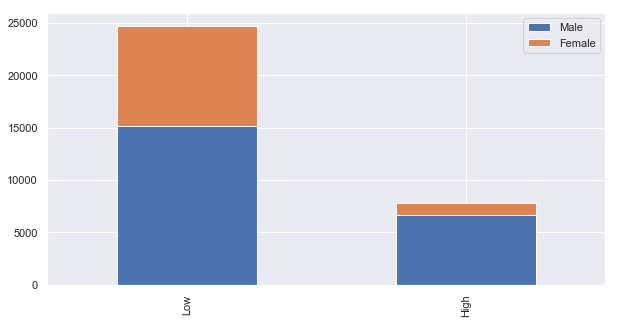

In [23]:
bar_chart('Sex')

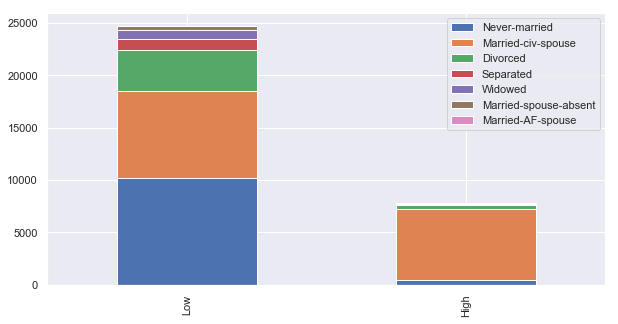

In [26]:
bar_chart('Martial Status')

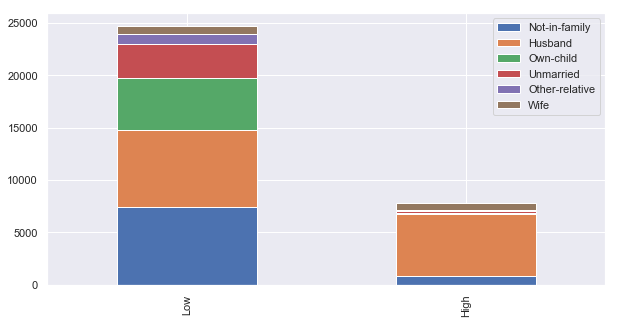

In [27]:
bar_chart('Relationship')

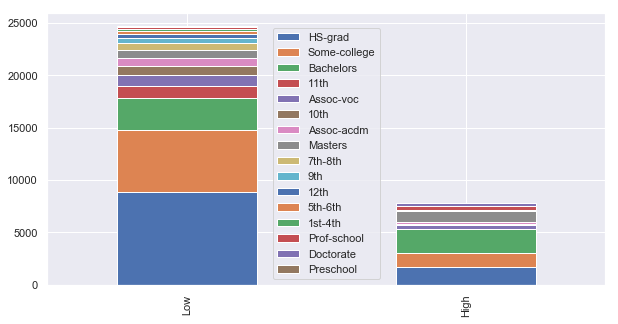

In [28]:
bar_chart('Education')

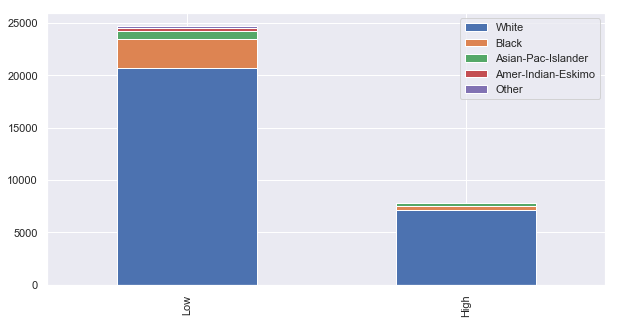

In [29]:
bar_chart('Race')

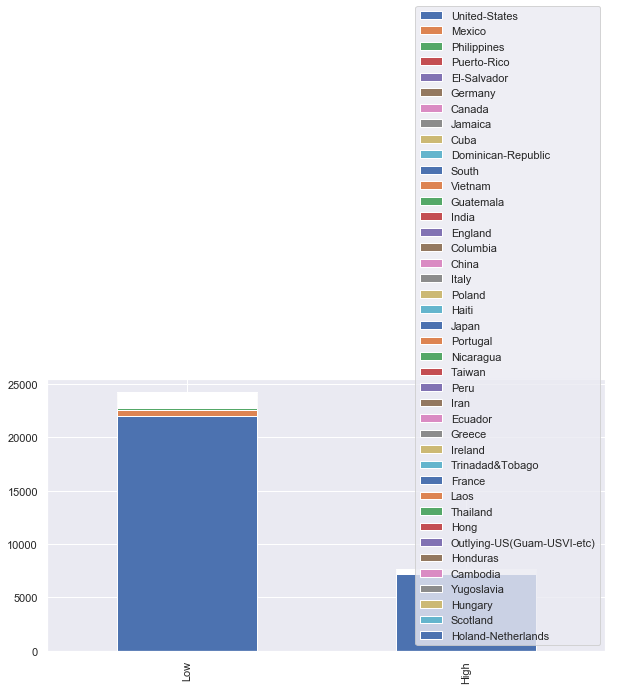

In [30]:
bar_chart('Country')

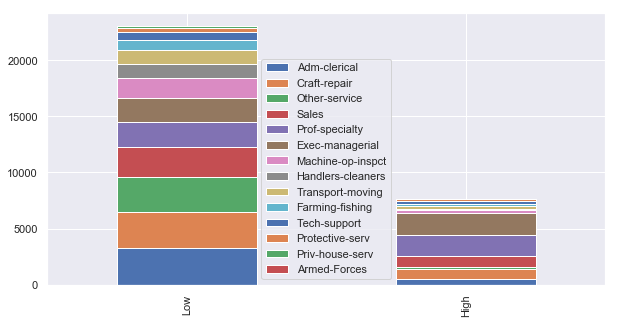

In [31]:
bar_chart('Occupation')

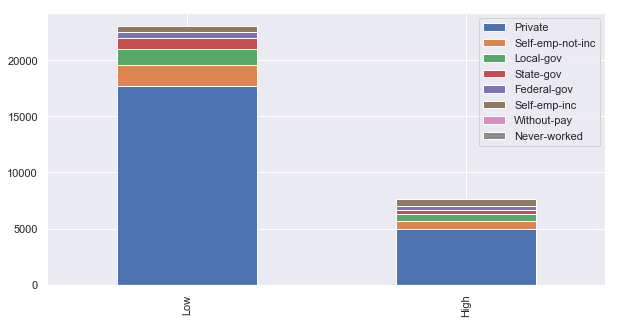

In [32]:
bar_chart('Workclass')

In [33]:
salary_map={' <=50K':1,' >50K':0}
train['salary']=train['salary'].map(salary_map).astype(int)

KeyError: 'salary'